# Case 2

In [2]:
import glob
import numpy   as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import cm
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.cluster import KMeans

from sklearn.decomposition   import PCA
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split


## read the dataset

In [3]:
# create empty data frames
dict_df_bios = dict()
bio_types = ['TEMP', 'HR', 'EDA', 'BVP', 'response']

for t in bio_types:    
    dict_df_bios[t] = pd.DataFrame()

In [4]:
### read in all dataframes in the folder, and merge the same biosignals 
paths = glob.glob('./dataset/**/*',recursive=True)

In [5]:
for item in paths:
    if item[-3:]=='csv':      
        l = item.split("/")

In [6]:
for item in paths:
    if item[-3:]=='csv':        
        temp_df = pd.read_csv(item) 
        
        term_list = item.split("/")
        # print(len(term_list))
        if len(term_list)==7:
            temp_df['cohort'] = term_list[2]
            temp_df['ID'] = term_list[3][-1]
            temp_df['round'] = term_list[4][-1]
            temp_df['phase'] = term_list[5][-1]

            bio = term_list[-1].split('.')[0]        
            dict_df_bios[bio] = pd.concat([dict_df_bios[bio], temp_df], 
                                          ignore_index=True)
            
        else:
            temp_df['cohort'] = term_list[3]
            temp_df['ID'] = term_list[4][-1]
            temp_df['round'] = term_list[5][-1]
            temp_df['phase'] = term_list[6][-1]

            bio = term_list[-1].split('.')[0]        
            dict_df_bios[bio] = pd.concat([dict_df_bios[bio], temp_df], 
                                          ignore_index=True)


In [51]:
# fill the data frames
df_temp = dict_df_bios['TEMP'].drop(columns=['Unnamed: 0'])
df_hr   = dict_df_bios['HR'].drop(columns=['Unnamed: 0'])
df_eda  = dict_df_bios['EDA'].drop(columns=['Unnamed: 0'])
df_bvp  = dict_df_bios['BVP'].drop(columns=['Unnamed: 0'])
df_resp = dict_df_bios['response'].drop(columns=['Unnamed: 0'])

In [8]:
# remove typo column
df_resp.drop(columns=['particpant_ID'], inplace=True)

In [10]:
df_resp

,puzzler,team_ID,E4_nr,upset,hostile,alert,ashamed,inspired,nervous,determined,...,afraid,active,frustrated,cohort,ID,round,phase,difficulty,participant_ID,parent
0,1.0,1.0,A0306B,1.0,1.0,3.0,1.0,3.0,2.0,2.0,...,1.0,2.0,1.0,D1_1,8,1,3,NaN,NaN,NaN
1,1.0,1.0,A0306B,1.0,1.0,4.0,1.0,4.0,2.0,4.0,...,1.0,3.0,2.0,D1_1,8,1,2,2.0,NaN,NaN
2,1.0,1.0,A0306B,1.0,1.0,4.0,1.0,3.0,3.0,3.0,...,1.0,2.0,2.0,D1_1,8,1,1,NaN,NaN,NaN
3,1.0,1.0,A0306B,2.0,1.0,2.0,3.0,2.0,1.0,2.0,...,1.0,2.0,4.0,D1_1,8,4,3,NaN,NaN,NaN
4,1.0,1.0,A0306B,2.0,1.0,2.0,3.0,2.0,2.0,3.0,...,1.0,3.0,7.0,D1_1,8,4,2,8.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,0.0,3.0,A02B10,2.0,1.0,4.0,2.0,2.0,3.0,5.0,...,2.0,5.0,3.0,D1_2,3,3,2,6.0,6.0,NaN
308,0.0,3.0,A02B10,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,2.0,1.0,D1_2,3,3,1,NaN,6.0,NaN
309,0.0,3.0,A02B10,1.0,1.0,2.0,1.0,1.0,1.0,2.0,...,1.0,2.0,1.0,D1_2,3,2,3,NaN,6.0,NaN
310,0.0,3.0,A02B10,2.0,2.0,3.0,2.0,1.0,3.0,4.0,...,2.0,5.0,2.0,D1_2,3,2,2,6.0,6.0,NaN


## Check the basics

### Temperature plots

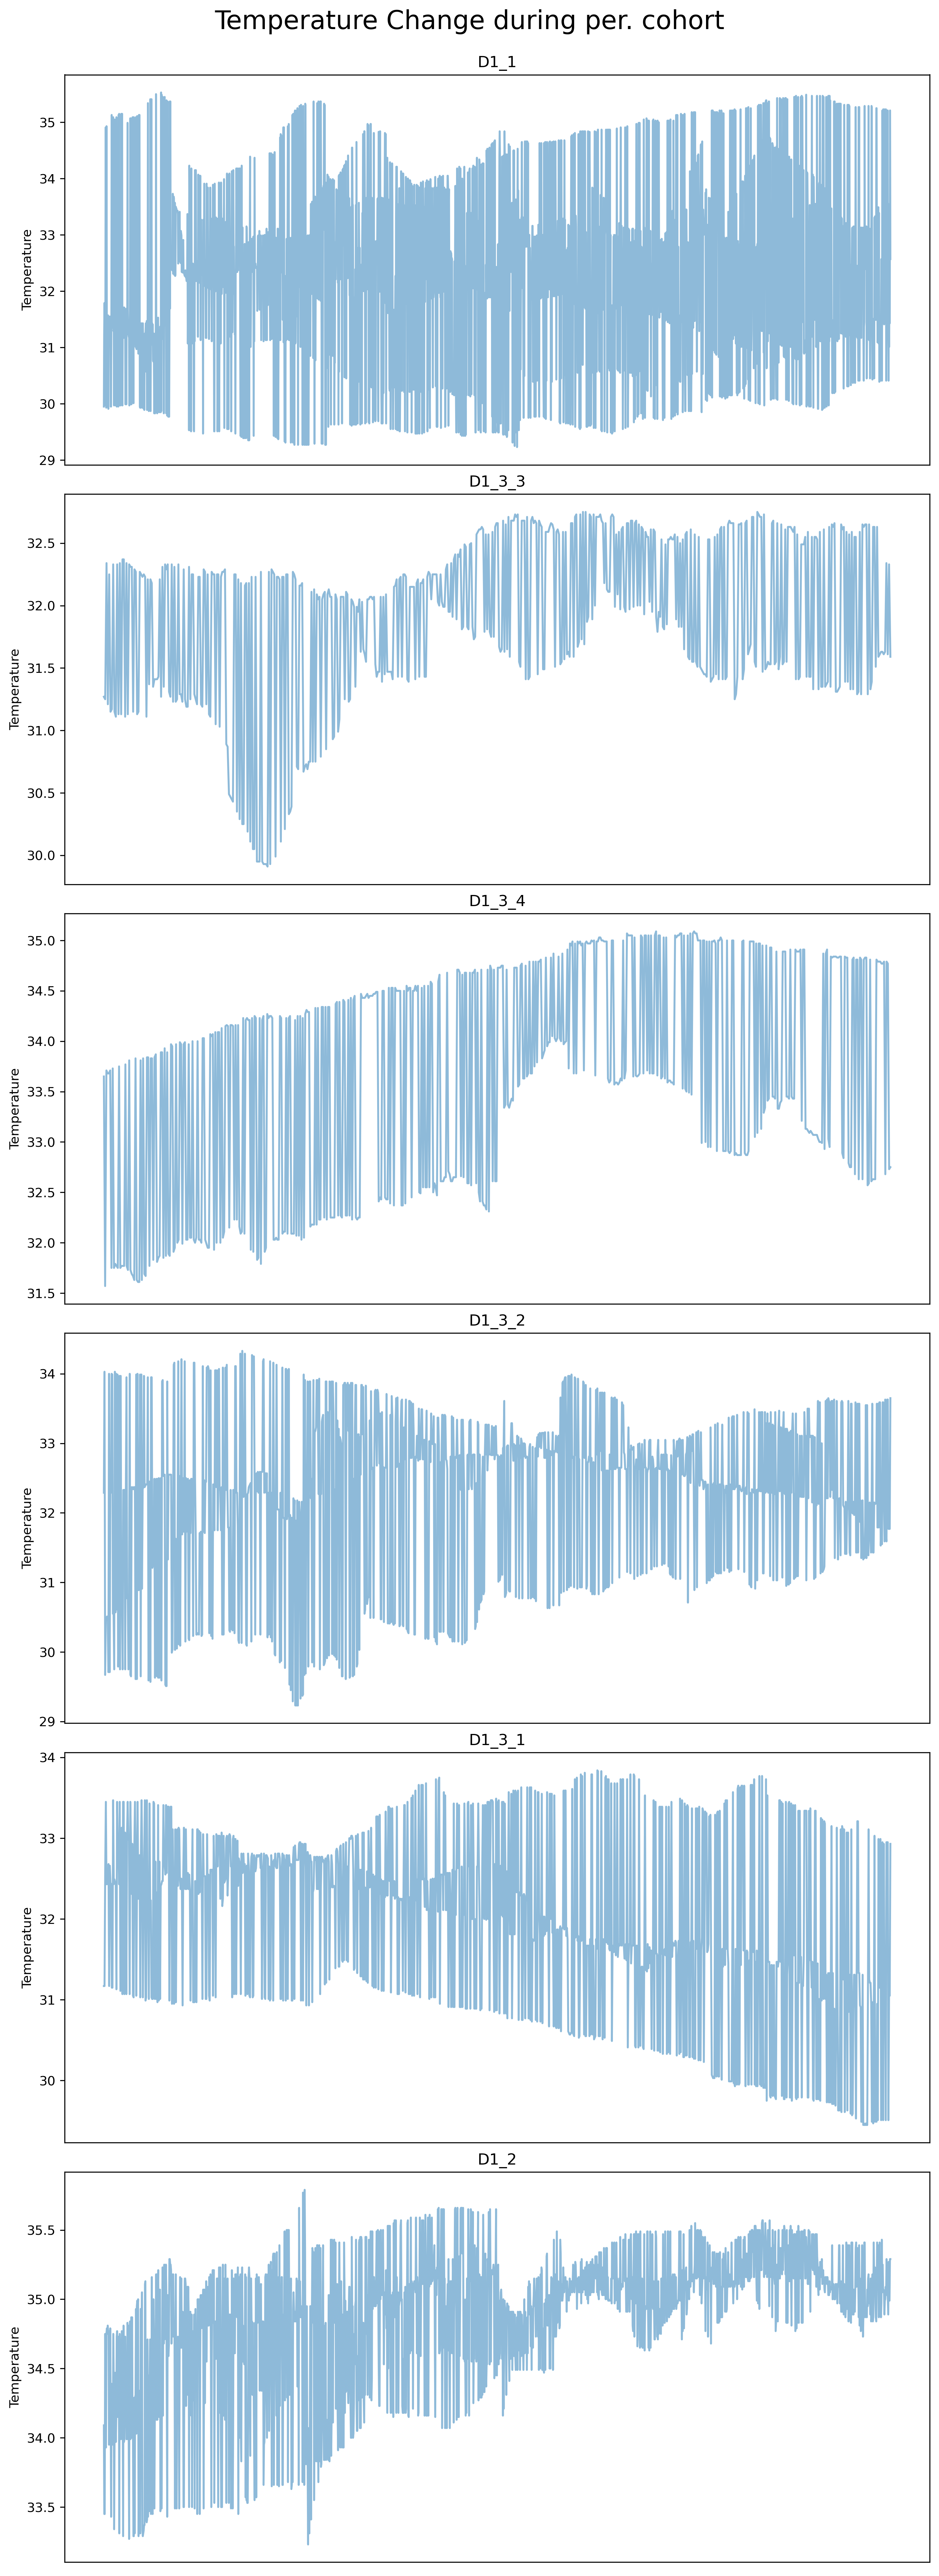

In [31]:
cohorts = df_temp.cohort.unique()

fig = plt.figure(figsize=(10, 30), dpi=300)
fig.subplots_adjust(hspace=.5)

for idx,c in enumerate(cohorts):
    df_temp_c = df_temp[df_temp['cohort']==c]
    df_temp_c = df_temp_c.sort_values(by=['time'], ascending=True)
    df_temp_c = df_temp_c.iloc[::48]

    ax = plt.subplot(6, 1, idx + 1)
    # cols  = cm.BuPu(df_temp_c['TEMP'].values/float(max(df_temp_c['TEMP'].values)))
    plt.plot(df_temp_c.time, df_temp_c.TEMP, alpha=.5)
    plt.title(c)

    # x_ticks, x_ticklabels = [], []
    # for x in df_temp_c.index:
    #     if x%144 == 0: 
    #         x_ticks.append(x)
    #         x_ticklabels.append(str(df_temp_c.at[x, 'time']))
    # ax.set_xticks(x_ticks)
    # ax.set_xticklabels(x_ticklabels)
    ax.set_ylabel('Temperature')
    ax.get_xaxis().set_visible(False)

fig.suptitle('Temperature Change during per. cohort',
            x=.5, y=.95, fontsize=20)
fig.tight_layout(pad=.3, rect=[0, .03, 1, .945])
plt.show()

In [30]:
df_temp_c = df_temp[df_temp['cohort']=='D1_1']
df_temp_c.sort_values(by=['time'], ascending=True)
df_temp_c.iloc[::48]

,TEMP,time,cohort,ID,round,phase
0,31.17,2021-12-17 16:32:13.000,D1_1,8,1,3
48,31.15,2021-12-17 16:32:25.000,D1_1,8,1,3
96,31.11,2021-12-17 16:32:37.000,D1_1,8,1,3
144,31.09,2021-12-17 16:32:49.000,D1_1,8,1,3
192,31.11,2021-12-17 16:33:01.000,D1_1,8,1,3
...,...,...,...,...,...,...
125808,32.87,2021-12-17 16:46:31.750,D1_1,3,2,1
125856,32.89,2021-12-17 16:46:43.750,D1_1,3,2,1
125904,32.91,2021-12-17 16:46:55.750,D1_1,3,2,1
125952,32.95,2021-12-17 16:47:07.750,D1_1,3,2,1


In [33]:
df_resp.columns

Index(['puzzler', 'team_ID', 'E4_nr', 'upset', 'hostile', 'alert', 'ashamed',
       'inspired', 'nervous', 'determined', 'attentive', 'afraid', 'active',
       'frustrated', 'cohort', 'ID', 'round', 'phase', 'difficulty',
       'participant_ID', 'parent'],
      dtype='object')

## Unsupervised learning (KMeans)

### downscale the data

In [117]:
def resample_df(df, freq):
    df_resampled = pd.DataFrame(columns=['cohort', 'ID', 'round', 'phase', 'elapsed_time'])
    df['time'] = pd.to_datetime(df['time'])
    for _, cohort_df in df.groupby('cohort'):
        # calibrate the start time
        start_time = cohort_df['time'].min()
        freq_sec = pd.tseries.frequencies.to_offset(freq)
        freq_sec = int(freq_sec.delta / np.timedelta64(1, 's'))
        start_time = start_time.replace(second=start_time.second // freq_sec * freq_sec)
        # print(start_time)
        # downsample to the specified frequency and take the mean
        resampled_df = cohort_df.groupby(['cohort','ID','round','phase']).resample(freq, on='time',).mean()
        # print(resampled_df[:10])
        # reset the index to make the unique columns a regular column
        resampled_df = resampled_df.reset_index()
        # calculate the elapsed time according to start time
        resampled_df['elapsed_time'] = (resampled_df['time'] - start_time).dt.total_seconds().astype(int)
        # resampled_df['elapsed_time'].apply(lambda x: x+1 if x % 5 == 4 else x)
        resampled_df.drop(columns=['time'],inplace=True)
        # print(resampled_df[:10])
        df_resampled = pd.concat([df_resampled, resampled_df])
    return df_resampled

In [118]:
df_ = resample_df(df_eda,'1S')
# df_['elapsed_time'].apply(lambda x: x if x % 5 == 0 or x % 5 == 1 else x + 1)
# df_[:10]

2021-12-17 16:11:54.750000
                                                EDA
cohort ID round phase time                         
D1_1   1  1     1     2021-12-17 16:11:55  0.192875
                      2021-12-17 16:11:56  0.183584
                      2021-12-17 16:11:57  0.182623
                      2021-12-17 16:11:58  0.181982
                      2021-12-17 16:11:59  0.181982
                      2021-12-17 16:12:00  0.181341
                      2021-12-17 16:12:01  0.180700
                      2021-12-17 16:12:02  0.181662
                      2021-12-17 16:12:03  0.180700
                      2021-12-17 16:12:04  0.181341
  cohort ID round phase       EDA  elapsed_time
0   D1_1  1     1     1  0.192875             0
1   D1_1  1     1     1  0.183584             1
2   D1_1  1     1     1  0.182623             2
3   D1_1  1     1     1  0.181982             3
4   D1_1  1     1     1  0.181982             4
5   D1_1  1     1     1  0.181341             5
6   D1_1  1  

In [105]:
# test with 5S and did not work
df_ = resample_df(df_eda,'5S')

2021-12-17 16:11:50.750000
                                                EDA
cohort ID round phase time                         
D1_1   1  1     1     2021-12-17 16:11:55  0.184609
                      2021-12-17 16:12:00  0.181149
                      2021-12-17 16:12:05  0.185442
                      2021-12-17 16:12:10  0.181790
                      2021-12-17 16:12:15  0.178778
                      2021-12-17 16:12:20  0.181021
                      2021-12-17 16:12:25  0.183456
                      2021-12-17 16:12:30  0.185186
                      2021-12-17 16:12:35  0.186083
                      2021-12-17 16:12:40  0.195438
  cohort ID round phase       EDA  elapsed_time
0   D1_1  1     1     1  0.184609             4
1   D1_1  1     1     1  0.181149             9
2   D1_1  1     1     1  0.185442            14
3   D1_1  1     1     1  0.181790            19
4   D1_1  1     1     1  0.178778            24
5   D1_1  1     1     1  0.181021            29
6   D1_1  1  

### one df with all biosignals

In [120]:
df_bio = pd.DataFrame()
for idx, df in enumerate([df_hr,df_eda,df_bvp,df_temp]):
    df_ = resample_df(df,'1S')
    if idx == 0:
        df_bio = df_
    else:
        df_bio = df_bio.merge(df_, on=['cohort', 'ID', 'round', 'phase','elapsed_time'])

2021-12-17 16:11:55
                                              HR
cohort ID round phase time                      
D1_1   1  1     1     2021-12-17 16:11:55  76.75
                      2021-12-17 16:11:56  76.75
                      2021-12-17 16:11:57  76.73
                      2021-12-17 16:11:58  76.72
                      2021-12-17 16:11:59  76.72
                      2021-12-17 16:12:00  76.70
                      2021-12-17 16:12:01  76.70
                      2021-12-17 16:12:02  76.77
                      2021-12-17 16:12:03  76.83
                      2021-12-17 16:12:04  76.88
  cohort ID round phase     HR  elapsed_time
0   D1_1  1     1     1  76.75             0
1   D1_1  1     1     1  76.75             1
2   D1_1  1     1     1  76.73             2
3   D1_1  1     1     1  76.72             3
4   D1_1  1     1     1  76.72             4
5   D1_1  1     1     1  76.70             5
6   D1_1  1     1     1  76.70             6
7   D1_1  1     1     1  76.77  

In [123]:
df_bio[:10]

,cohort,ID,round,phase,elapsed_time,HR,EDA,BVP,TEMP
0,D1_1,1,1,1,0,76.75,0.192875,-55.136667,30.97
1,D1_1,1,1,1,0,76.75,0.192875,158.042500,30.97
2,D1_1,1,1,1,1,76.75,0.183584,-194.910000,31.01
3,D1_1,1,1,1,2,76.73,0.182623,70.767969,30.97
4,D1_1,1,1,1,3,76.72,0.181982,-127.086406,30.99
5,D1_1,1,1,1,4,76.72,0.181982,17.581563,30.97
6,D1_1,1,1,1,5,76.70,0.181341,20.999063,31.01
7,D1_1,1,1,1,6,76.70,0.180700,-8.923906,30.99
8,D1_1,1,1,1,7,76.77,0.181662,13.508281,30.99
9,D1_1,1,1,1,8,76.83,0.180700,7.667969,31.01


### rescale the data

In [125]:
# select the features to use for clustering
features = ['HR', 'EDA', 'BVP', 'TEMP']
scaler   = StandardScaler()
df_bio_scaled = scaler.fit_transform(df_bio[features])

Use elbow method or silhouette analysis to determine the optimal number of clusters for KMeans. Elbow method is a heuristic approach that involves plotting the within-cluster sum of squares (WSS) against the number of clusters and identifying the "elbow" point where the WSS starts to level off. Silhouette analysis measures how well each data point fits its assigned cluster compared to other clusters, and can help identify the optimal number of clusters with the highest average silhouette score.

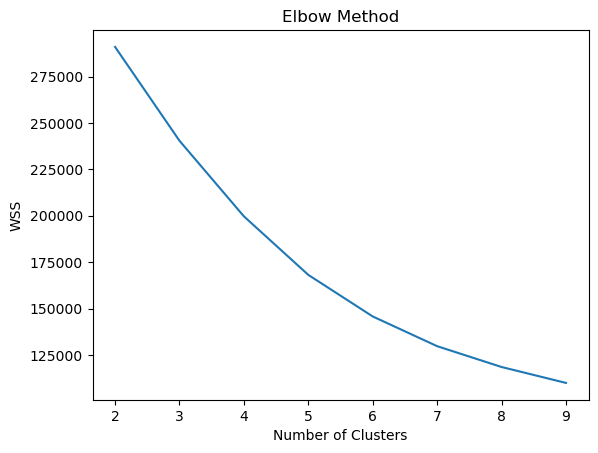

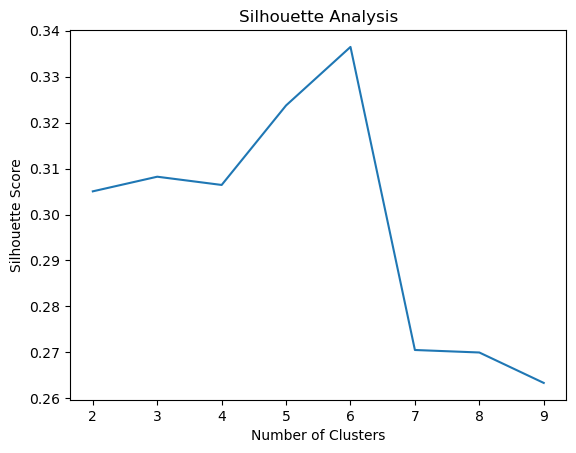

In [126]:
wss = []
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_bio_scaled)
    wss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_bio_scaled, kmeans.labels_))

plt.plot(range(2, 10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSS')
plt.show()

plt.plot(range(2, 10), silhouette_scores)
plt.title('Silhouette Analysis')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

### visualization

In [129]:
def plotting(X, kmeans, y_pred, ax):
    ax.clear()
    ax.scatter(X[:,0], X[:,1], c = y_pred, marker= ".")
    ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c = np.arange(kmeans.cluster_centers_.shape[0]), marker= "*", s=50)
    ax.set_title("Current iteration")

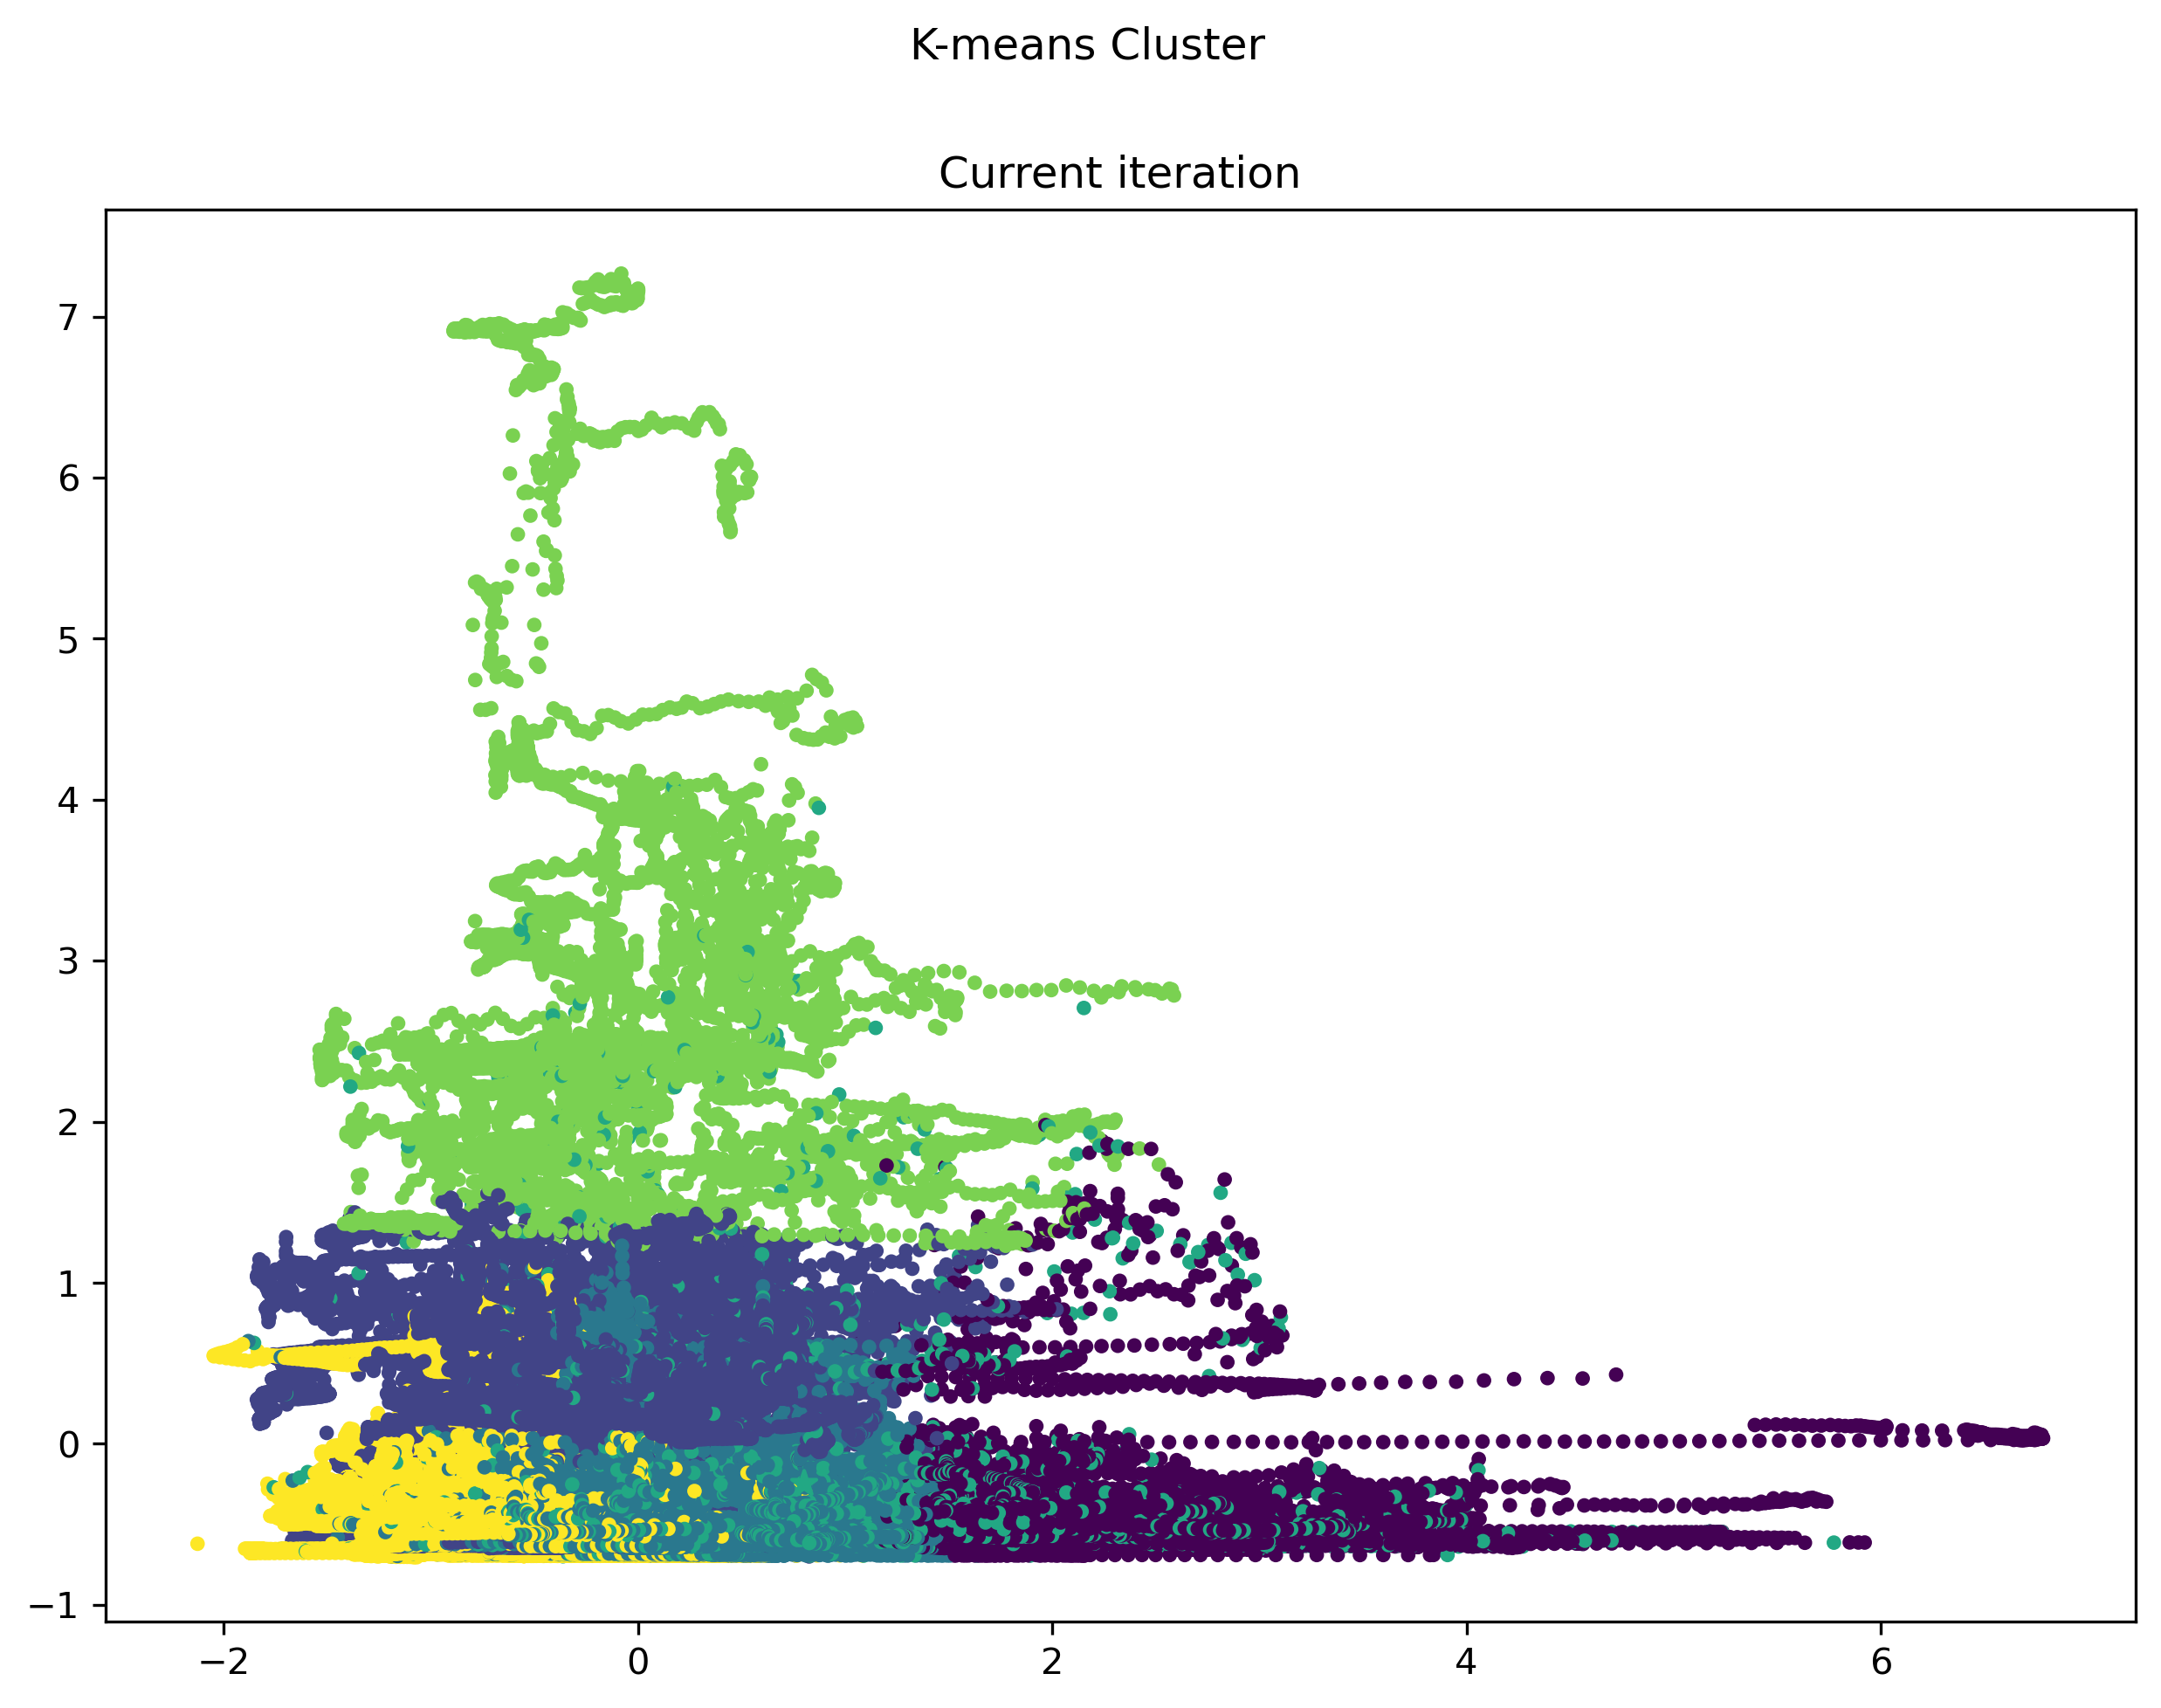

In [131]:
clusters = 6 # Control how many clusters we want

fig, ax = plt.subplots(figsize=(10,7), dpi=300)
plt.suptitle("K-means Cluster")

kmeans = KMeans(n_clusters = clusters, n_init = 1, random_state = 42, max_iter = 1)
y_pred = kmeans.fit_predict(df_bio_scaled)

ax.scatter(df_bio_scaled[:,0], df_bio_scaled[:,1], marker = '.', c = y_pred)

current_iter = 0
total_iter = 10
for _ in range(total_iter):
    kmeans= KMeans(n_clusters = clusters, init = "random", 
                   n_init = 1, random_state = 0, 
                   max_iter = 1 + current_iter)
    y_pred = kmeans.fit_predict(df_bio_scaled)
    
    plotting(df_bio_scaled, kmeans, y_pred, ax)
    fig.canvas.draw()
    
    current_iter += 1
    print(f'Iteration nr: {current_iter}.', end='\r')
    # time.sleep(1)

plt.show()

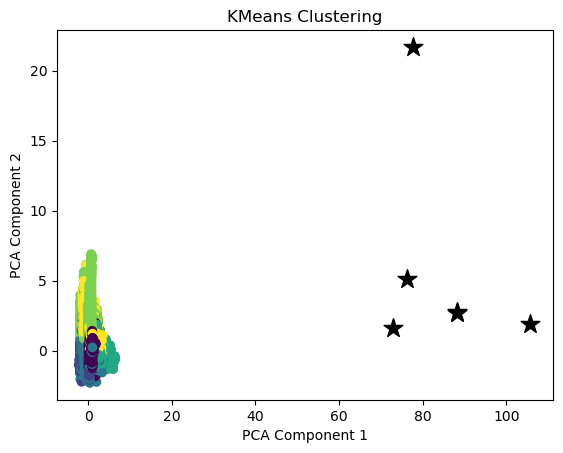

In [128]:
# calculate the centroid values of each cluster
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# visualize the data using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(df_bio_scaled)

plt.scatter(data_pca[:,0], data_pca[:,1], c=kmeans.labels_)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=200, c='k')
plt.title('KMeans Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()